In [1]:
# This is Jupyter version of 'load_profile_utavg.py' for Primary schools
# Created 6Apr23
# To calculate average load profile of Schools based on one-year of data
# All outputs are in Wh (raw data is in kWh but I converted it to Wh for hrly plots)
# check outputs with excel: 'avg_ut analysis PJua'
# see also Jupyter files: 'pjua_hrly_plots_all, 'clinics_load_profile_utavg';
# 'prischools_load_profile_utavg'; 'secschools_load_profile_utavg'

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Secondary schools 
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Primary" in entry) or ("primary" in entry)}
# ^above lines is what changes between institution type in code 
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame.round(2)

,Gamachu Primary School,Akadeli Primary School,Kasimani Primary School,Kibora Primary School,Loruth Primary School,Garbatula Primary Boarding,Mtsangatamu Primary School,Merti Muslim Primary School,Todonyang Primary School,Mbita Primary School,...,Mwamambi Primary School,Yapha Primary School,Mabayani Primary School,Mbilini Primary School,Maiyini Primary School,Kapecha Primary School,Paola Katsuhanzala Primary School,Jezazhomu Primary School,Mapawa Primary School,Kaalem Primary School
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,38.78,26.29,110.95,29.78,66.79,60.93,37.13,52.56,28.94,127.46,...,38.15,90.08,61.78,14.76,52.97,88.17,68.90,99.13,70.26,47.65
1,37.90,26.62,112.59,29.65,66.31,60.29,37.59,53.09,29.28,125.58,...,38.37,87.39,58.13,13.82,52.19,89.70,69.24,100.37,70.49,43.74
2,35.45,26.64,106.85,30.19,65.55,61.22,37.46,52.16,29.62,126.15,...,37.92,84.98,57.43,12.81,49.96,89.86,71.01,102.29,69.70,41.92
3,35.13,27.15,106.35,30.26,65.43,61.94,37.38,53.11,28.97,126.92,...,37.04,85.85,56.96,13.03,48.63,90.37,72.50,106.02,69.62,39.56
4,36.68,27.32,106.81,30.34,64.69,63.05,37.51,54.57,28.65,140.70,...,36.35,88.42,58.95,13.09,48.14,96.76,75.12,111.85,69.81,40.51
5,44.79,27.44,106.34,30.67,63.88,63.32,37.52,56.00,28.54,155.56,...,35.25,83.96,73.67,12.85,48.12,104.54,77.59,114.74,60.31,44.58
6,102.44,41.63,88.50,29.59,36.08,42.62,38.41,90.63,29.12,86.16,...,26.02,37.26,69.00,11.06,36.43,61.55,69.23,122.40,26.48,33.59
7,70.66,104.77,79.33,30.36,19.72,44.15,52.00,45.64,34.78,74.38,...,19.01,23.64,39.77,10.24,27.25,53.88,60.00,68.64,23.82,16.58
8,48.60,110.81,73.38,32.15,23.86,57.85,56.41,20.77,47.94,66.66,...,12.96,28.33,30.51,9.84,28.62,59.89,53.80,38.52,21.51,19.26


In [3]:
# ^is the df with the average utilisation per hour based on one-year of measured data
# from HB's code output. 

# Export df to check mean and std
# results_frame.to_csv("primary_avg_31Mar.csv")  # this is what i then analysed in excel
# this is the file I exported back when I did it on Spyder to analyse data for thesis draft

# Setting to plot
sns.set(rc={"figure.dpi":300})
# sns.set_palette("colorblind", n_colors=len(filenames))
sns.set_context("notebook")
sns.set_style("whitegrid")

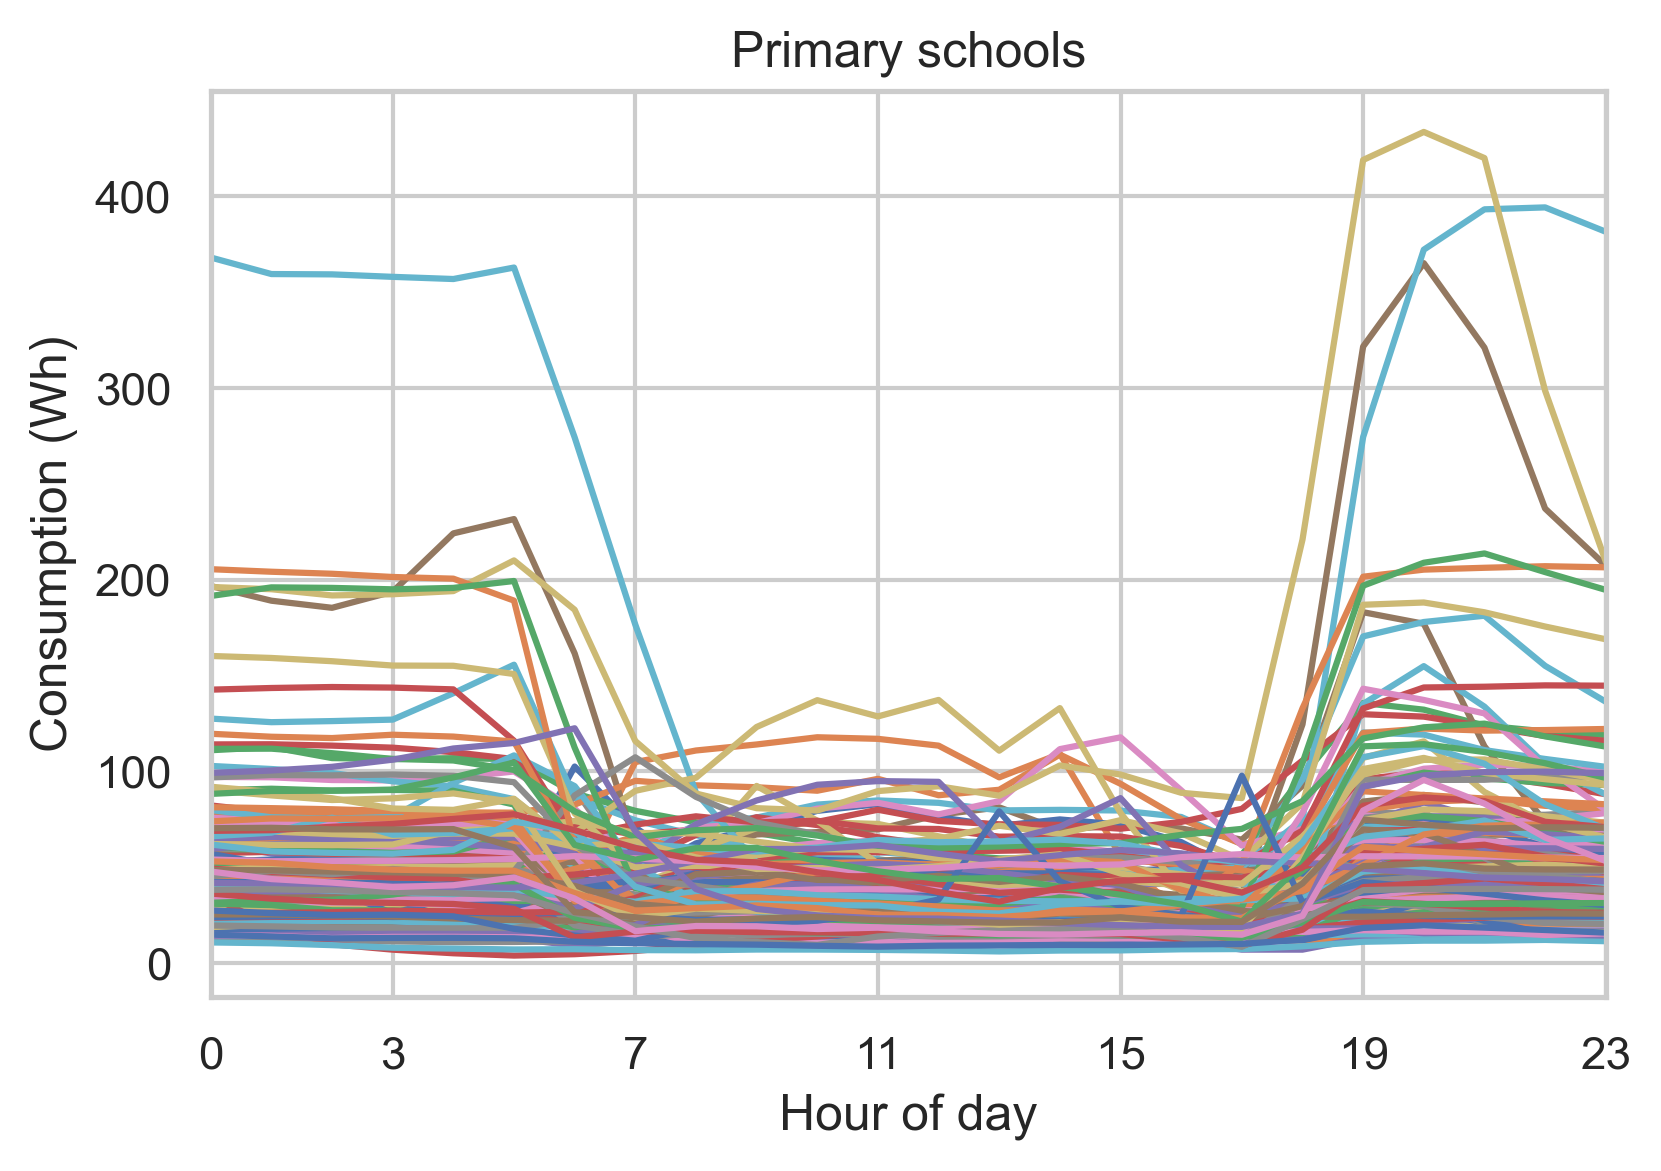

In [6]:
# Plot all sites together
plt.plot(results_frame)
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.show()

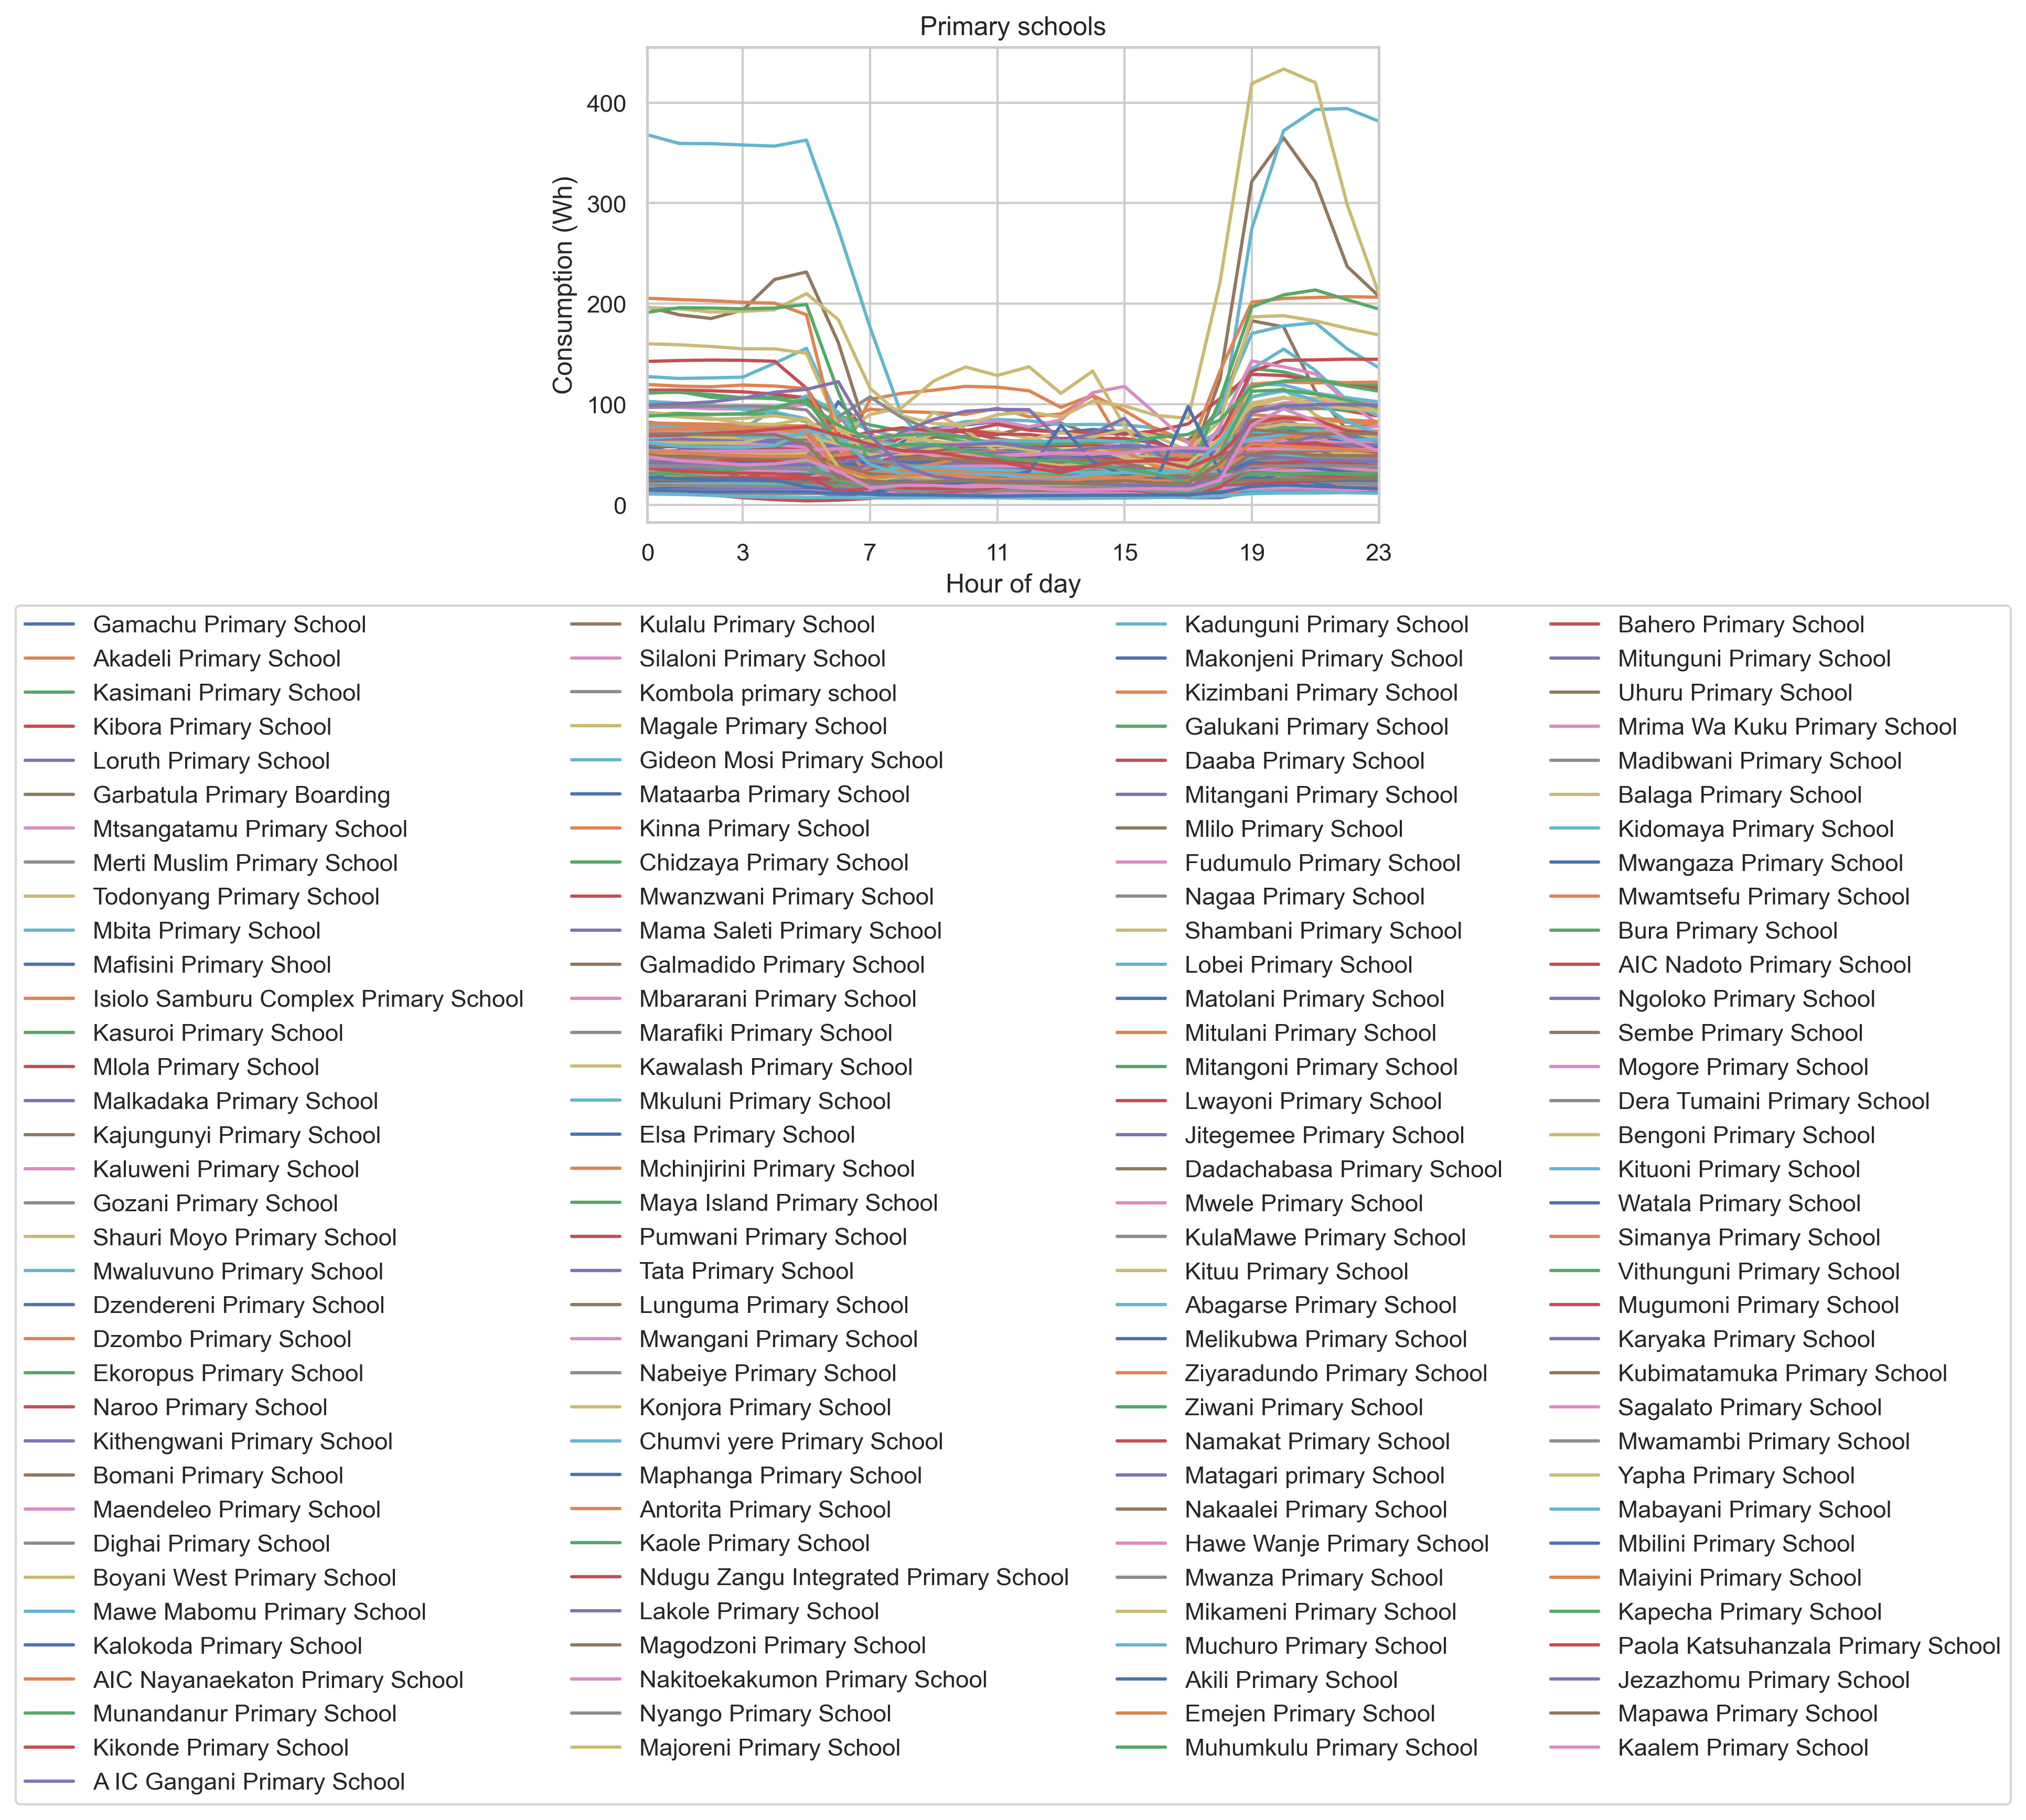

In [7]:
# Plot it with format
plt.plot(results_frame, label=results_frame.columns)  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

# improve: set different palette so colours don't repeat

In [8]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites.round(2)  # to know peak utilisation of all sites together

,Mean,Std_dev
Timestamp,,
0,57.49,45.78
1,56.90,45.34
2,56.28,45.17
3,55.89,45.28
4,56.60,46.30
5,56.43,46.83
6,45.30,33.68
7,39.14,24.04
8,39.20,20.28


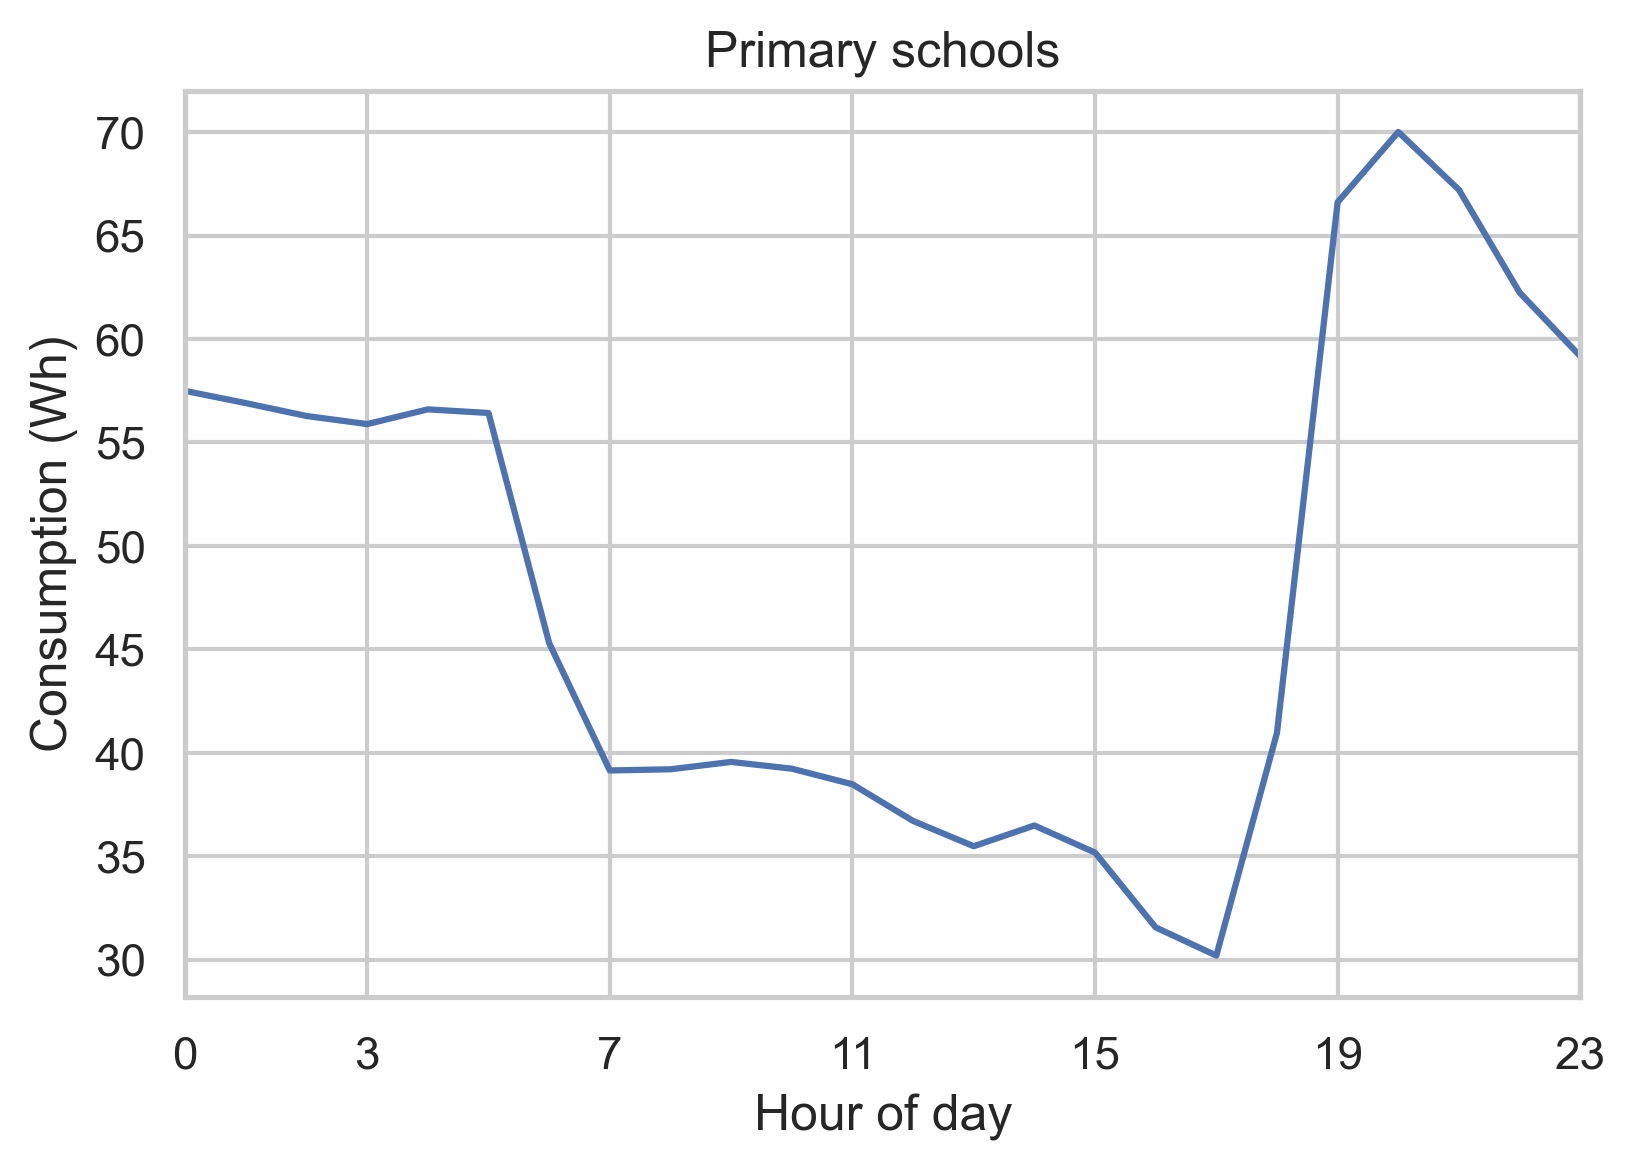

In [9]:
# Plot Mean consumption all sites
#sns.lineplot(data=hrly)
plt.plot(all_sites["Mean"])  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.show()

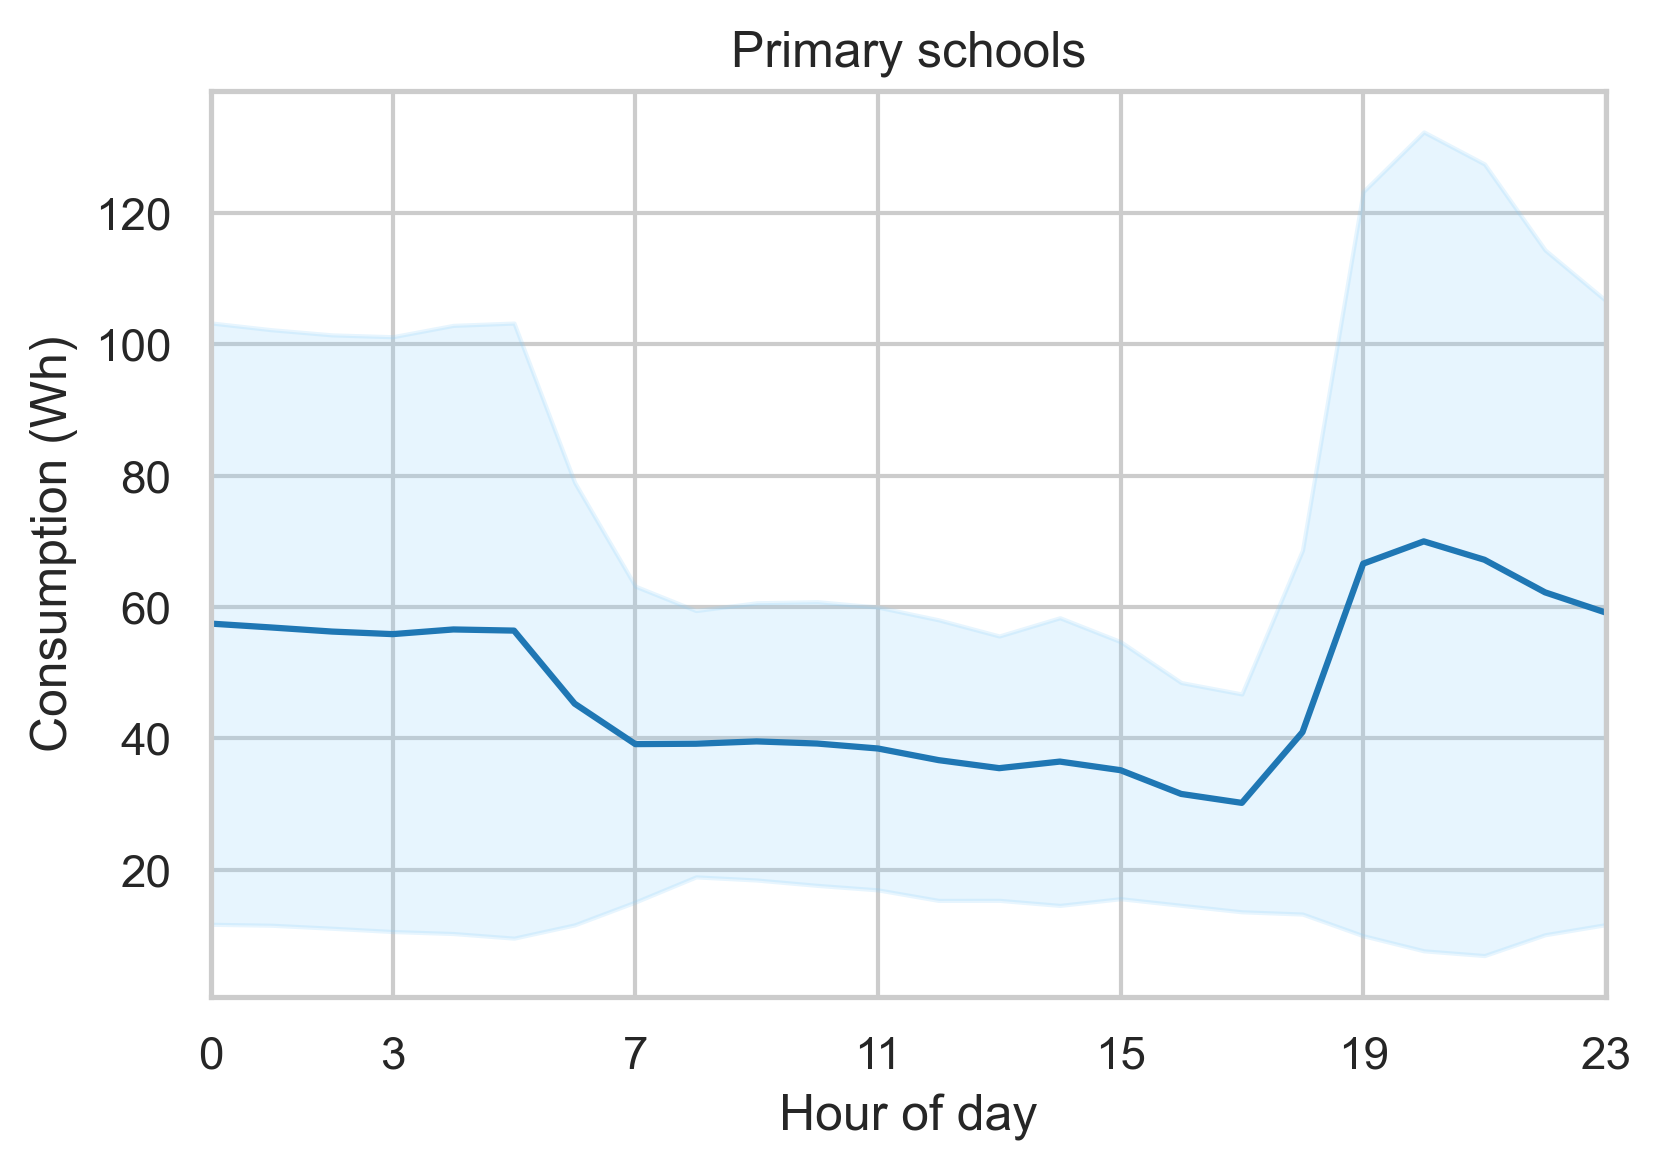

In [10]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:blue", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightskyblue",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.show()

In [11]:
# For another format style option
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")

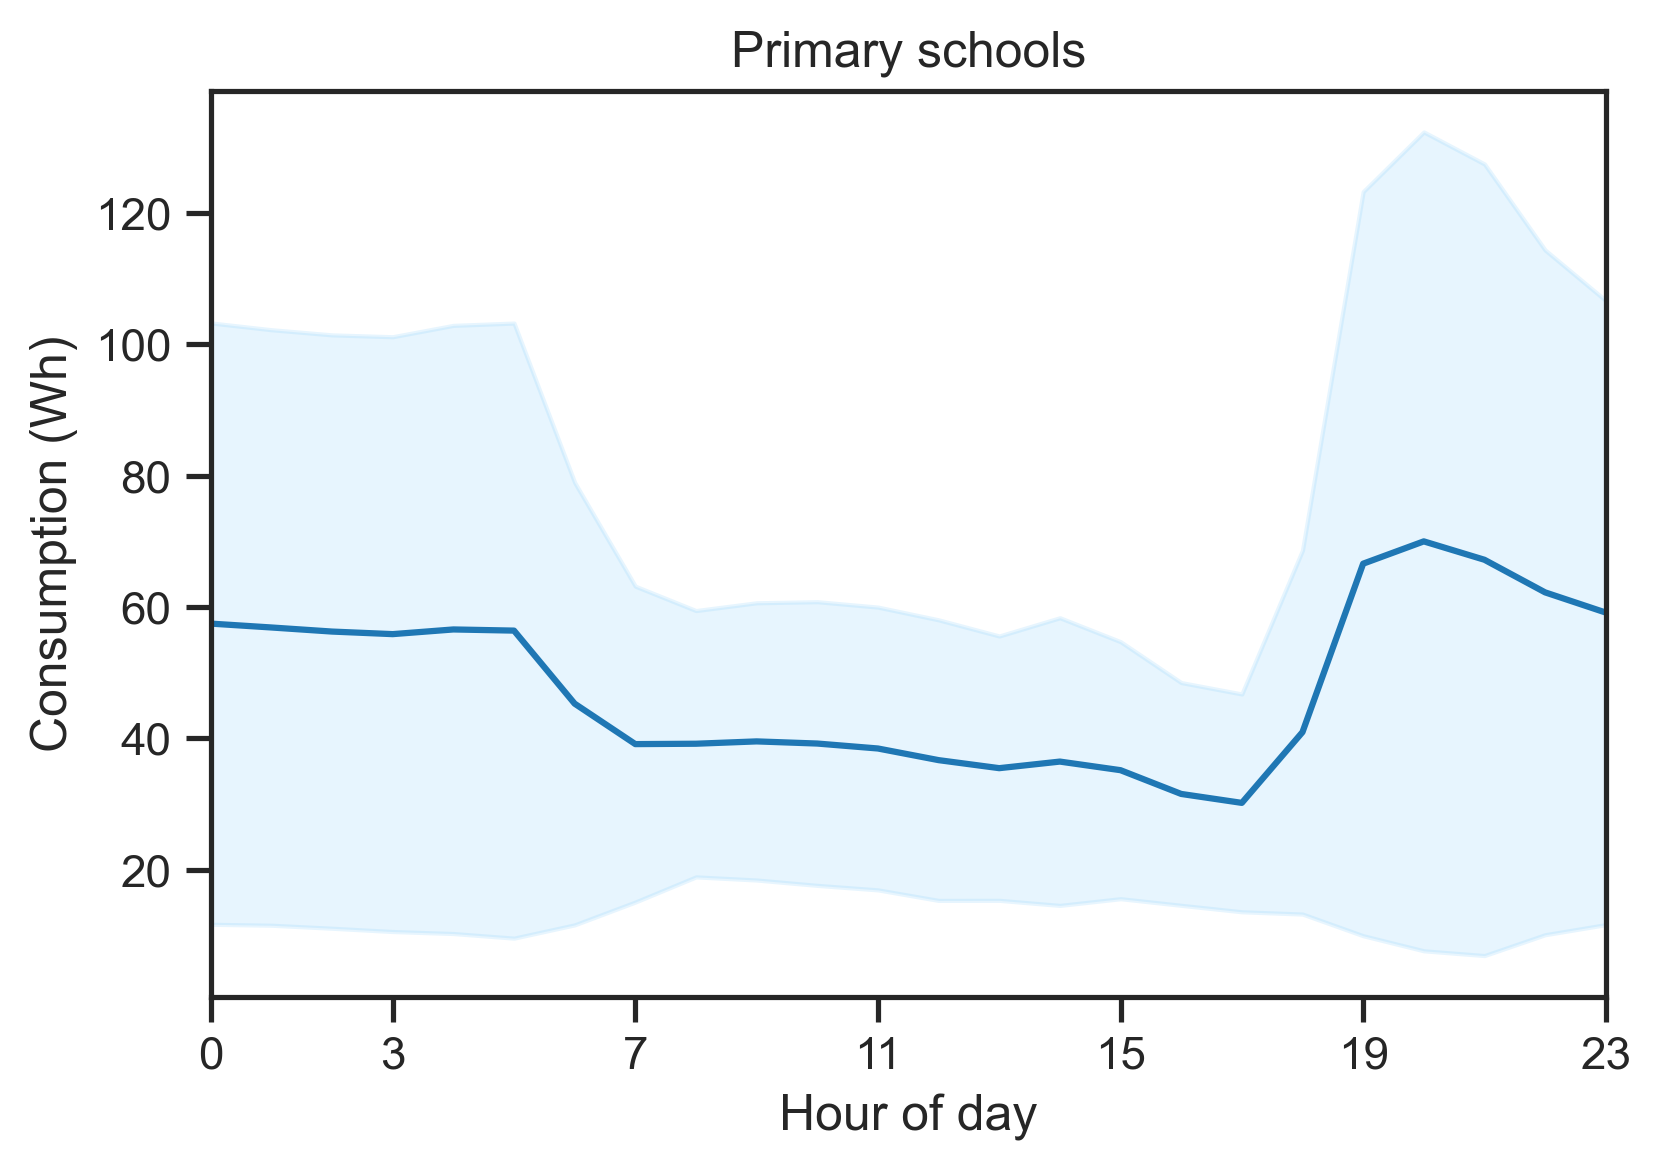

In [12]:
# Repeat above plot
# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:blue", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightskyblue",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Primary schools")
plt.show()

In [13]:
# To calculate average daily utilisation (all is in Wh)
avg_daily = results_frame.sum().to_frame()

# Rename column name of df
avg_daily.rename(columns = {0:"Avg_daily"}, inplace = True)

avg_daily.round(2)  # to show in Jupyter

,Avg_daily
Gamachu Primary School,891.32
Akadeli Primary School,1341.66
Kasimani Primary School,2140.30
Kibora Primary School,738.29
Loruth Primary School,1103.61
...,...
Kapecha Primary School,1700.94
Paola Katsuhanzala Primary School,1438.86
Jezazhomu Primary School,1577.23
Mapawa Primary School,1081.37


In [14]:
# Get stats of average daily values (all sites)
avg_daily.describe().round(2)
# this are values I used in draft to describe utilisation on an average day for all sites of this type

,Avg_daily
count,137.00
mean,1152.33
std,705.55
min,199.92
25%,709.62
50%,1010.74
75%,1379.24
max,5021.31


In [15]:
# To convert to kWh
avg_daily_kwh = avg_daily.div(1000)
avg_daily_kwh.round(2)  # to show in Jupyter

,Avg_daily
Gamachu Primary School,0.89
Akadeli Primary School,1.34
Kasimani Primary School,2.14
Kibora Primary School,0.74
Loruth Primary School,1.10
...,...
Kapecha Primary School,1.70
Paola Katsuhanzala Primary School,1.44
Jezazhomu Primary School,1.58
Mapawa Primary School,1.08


In [ ]:
# See 'load_profile_utavg.py' for code to re-check outputs for peace of mind if needed
# or for other ways of plotting or calculating data with a different format output 
# this are the plots/values I used in thesis draft Ch. 4 (sent on 3Apr23). 
# Just copy and paste them in word or ppt and then word if it doesn't work.
# Maybe save plots at some point. 
# If i need to rerun it DON'T export csv unless something in the data needs to change in future. 